In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "spheres.png"

Load the input image (whose path was supplied via command line argument) and display the image to our screen

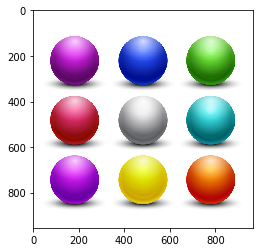

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale

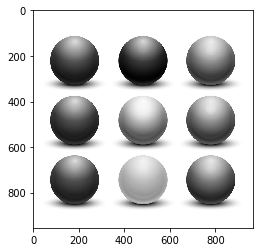

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Applying edge detection we can find the outlines of objects in images


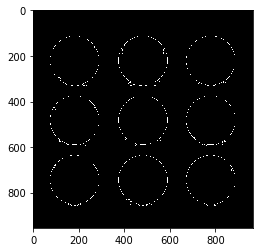

In [5]:
edged = cv2.Canny(gray, 10, 100)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values less than 225 to 255(white; foreground) and all pixel values >= 225 to 0 (black; background), thereby segmenting the image.

This can be tweeked so say all pixel values less than 128.

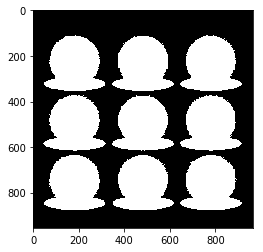

In [6]:
threshold = 252
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

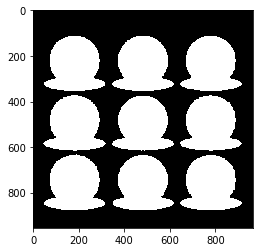

In [70]:
# Median Filtering
#thresh = cv2.medianBlur(thresh,5)
#plt.imshow(thresh, cmap='gray')

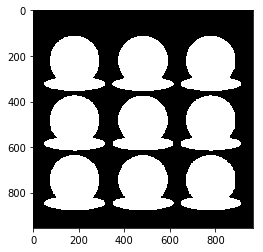

In [7]:
thresh=cv2.erode(thresh, None, iterations = 5)
thresh=cv2.dilate(thresh, None, iterations = 5)
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image

In [78]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

In [42]:
len(cnts)

9

Loop over the contours

182 503
779 242


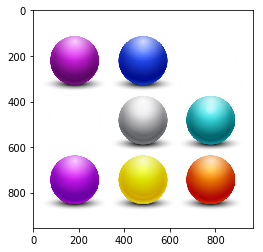

In [79]:
for c in cnts:
    M = cv2.moments(c)
    
    #centroid
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # draw each contour on the output image with a 3px thick black outline
    #cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    #cv2.circle(output, (cX, cY), 7, (255, 0, 0), -1)
    
    # target is red sphere
    if (cX<300 and cX>100 and cY<600 and cY>400) :
        print(cX,cY) 
        cv2.drawContours(output, [c], -1, (255, 255, 255), -1)
        
    # target is green sphere    
    if (cX<900 and cX>700 and cY<300 and cY>100) :
        print(cX,cY) 
        cv2.drawContours(output, [c], -1, (255, 255, 255), -1)     
      
plt.imshow(output)

### Draw the total number of contours found in purple

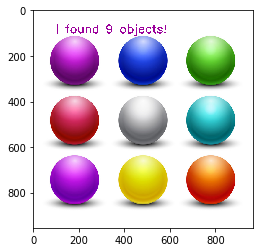

In [73]:
output = image.copy()
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (100, 100),  cv2.FONT_HERSHEY_SIMPLEX, 1.7, (155, 0, 155), 4)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects

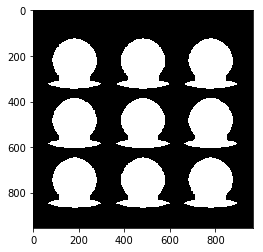

In [100]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 10)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects

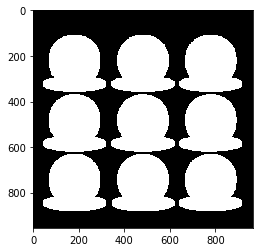

In [101]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise AND to our input image, keeping only the masked regions

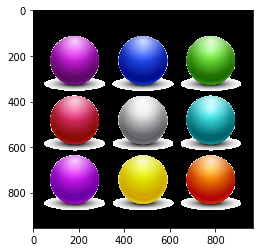

In [102]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Ex 1
    A) Can you remove the yellow square from the image?
    B) Go through the tutorial but with the "spheres.png" image. (replace tetris_blocks with spheres.png)
    C) Tweak the parameters of the thresholding can you threshold all the spheres?
    D) Can you remove the red sphere?
    C) Can you remove the green?